In [1]:
#  Git link: https://github.com/dayanaviana/WGU/tree/main/D209-Task1 

In [2]:
from platform import python_version
("Pyhton version:", python_version())

('Pyhton version:', '3.11.1')

## Imports

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PyUtils import MyPyUtils as utils
from PyRepo import MyPyRepo as repo
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [4]:
filePath = "churn_0_Raw.csv"
df_raw = pd.read_csv(filePath, index_col=False)
utils.writeDFToFile(df_raw, "df_info_0_Raw.txt")
print(df_raw.columns)
df_raw

# Check for missing values
nullseries = df_raw.isna().sum().sort_values()
print("Null Values: ")
(nullseries[nullseries > 0])


Complete details in df_info_0_Raw.txt file
Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')
Null Values: 


InternetService    2129
dtype: int64

# Remove features
Remove data that is too granular

In [5]:
#Remove granular columns
df_raw_reduced = df_raw.drop(columns=['CaseOrder','Customer_id', 'Interaction', 'UID', 'City', 'State', 
       'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'InternetService', 'Job', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
print(df_raw_reduced.shape)
df_raw_reduced.info()
utils.writeDFToFile(df_raw_reduced, "df_info_1_Reduced.txt")
df_raw_reduced.to_csv('churn_1_Reduced.csv')
df = df_raw_reduced

repo.df = df

# Clear variables
del df_raw

(10000, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet  

# Data standardization
Scale numeric data into [-1,1] range

In [6]:
# https://www.w3schools.com/python/python_ml_scale.asp
 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

numeric_columns_array = df.select_dtypes(include=['int64','float64']).columns.to_list()

# Scale numeric data
a_ndarray = sc_x.fit_transform(df[numeric_columns_array]) 

# Transform array into a Data Frame
df_standardized = pd.DataFrame(a_ndarray, columns=numeric_columns_array)

# Remove numeric columns from DF
df_auxiliar = df.drop(numeric_columns_array, axis='columns')

# Merge standardized colums to DF
df = pd.merge(df_standardized, df_auxiliar, left_index=True, right_index=True)

print(df.shape)
df.info()
utils.writeDFToFile(df, "df_info_2_Standardized.txt")

# Clear variables
del sc_x, a_ndarray, df_standardized, df_auxiliar
  

(10000, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Children              10000 non-null  float64
 2   Age                   10000 non-null  float64
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Email                 10000 non-null  float64
 6   Contacts              10000 non-null  float64
 7   Yearly_equip_failure  10000 non-null  float64
 8   Tenure                10000 non-null  float64
 9   MonthlyCharge         10000 non-null  float64
 10  Bandwidth_GB_Year     10000 non-null  float64
 11  Area                  10000 non-null  object 
 12  Marital               10000 non-null  object 
 13  Gender                10000 non-null  object 
 14  Churn                 10000 non-null  object 
 15  Techie  

# Data Encoding 
Convert Categorical into binary

In [7]:
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
print("\nCategorical features")
print(categorical_features)
print("\n")

df = pd.get_dummies(data=df, columns=categorical_features, drop_first=True)
df.info()
utils.writeDFToFile(df, "df_info_3_Encoded.txt")


Categorical features
['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  float64
 1   Children                               10000 non-null  float64
 2   Age                                    10000 non-null  float64
 3   Income                                 10000 non-null  float64
 4   Outage_sec_perweek                     10000 non-null  float64
 5   Email                                  10000 non-null  float64
 6   Contacts                               10000 non-null  float64
 7   Yearl

# Fix Data Types
Change uint8 type to int64

In [8]:
uint8_columns_array = df.select_dtypes(include=['bool']).columns.to_list()
print(uint8_columns_array)

for item in uint8_columns_array:
    # convert Dtype from 'uint8' to 'int64'
    df[item] = df[item].astype('int64')


print("\n")
df.info()
utils.writeDFToFile(df, "df_info_4_DataTypeFixed.txt")
df.to_csv('churn_2_Transformed.csv')

# Clear variables
del uint8_columns_array, item


['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  float64
 1   Children                               10000 non-null  float64
 2   Age                                    10000 non-null  float64
 3   Income  

In [9]:
# Find the pearson correlations matrix
corr = df.corr(method = 'pearson')

plt.figure(figsize=(35,28), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [10]:
#Keep only data which corelation to Churn_Yes > 0.1

df = df[["Churn_Yes", 
             "Tenure", 
             "StreamingMovies_Yes", 
             "StreamingTV_Yes", 
             "Multiple_Yes", 
             "Contract_Two Year", 
             "Contract_One year",
             "Bandwidth_GB_Year",
             "MonthlyCharge"
]]

# Summary Statistics

In [11]:
# Summary for Numerical data
df_raw_reduced.describe()

Population    Children           Age         Income  \
count   10000.000000  10000.0000  10000.000000   10000.000000   
mean     9756.562400      2.0877     53.078400   39806.926771   
std     14432.698671      2.1472     20.698882   28199.916702   
min         0.000000      0.0000     18.000000     348.670000   
25%       738.000000      0.0000     35.000000   19224.717500   
50%      2910.500000      1.0000     53.000000   33170.605000   
75%     13168.000000      3.0000     71.000000   53246.170000   
max    111850.000000     10.0000     89.000000  258900.700000   

       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.635953   
min              0.099747      1.000000      0.000000              0.000000   
25%              8.018214     10.000000      0.000000              0.000000   
50%             10.018560     12.000000      1.000000              0.000000   
75%             11.969485     14.000000      2.000000              1.000000   
max             21.207230     23.000000      7.000000              6.000000   

             Tenure  MonthlyCharge  Bandwidth_GB_Year  
count  10000.000000   10000.000000       10000.000000  
mean      34.526188     172.624816        3392.341550  
std       26.443063      42.943094        2185.294852  
min        1.000259      79.978860         155.506715  
25%        7.917694     139.979239        1236.470827  
50%       35.430507     167.484700        3279.536903  
75%       61.479795     200.734725        5586.141370  
max       71.999280     290.160419        7158.981530

In [12]:
# Summary for categorial data
categorical_summary = df_raw_reduced.describe(include='object')
categorical_summary.to_csv("univariate_categorical_summary.csv")
categorical_summary

Area   Marital  Gender  Churn Techie        Contract Port_modem  \
count      10000     10000   10000  10000  10000           10000      10000   
unique         3         5       3      2      2               3          2   
top     Suburban  Divorced  Female     No     No  Month-to-month         No   
freq        3346      2092    5025   7350   8321            5456       5166   

       Tablet  Phone Multiple OnlineSecurity OnlineBackup DeviceProtection  \
count   10000  10000    10000          10000        10000            10000   
unique      2      2        2              2            2                2   
top        No    Yes       No             No           No               No   
freq     7009   9067     5392           6424         5494             5614   

       TechSupport StreamingTV StreamingMovies PaperlessBilling  \
count        10000       10000           10000            10000   
unique           2           2               2                2   
top             No          No              No              Yes   
freq          6250        5071            5110             5882   

           PaymentMethod  
count              10000  
unique                 4  
top     Electronic Check  
freq                3398

# Sampling Data

In [13]:
# 80% Trainig sample , 30% Test sample
target = 'Churn_Yes'
Y = df[target] #target
X = df.drop(target, axis=1) #Predictors
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (7000, 8)
y_train: (7000,)
x_test: (3000, 8)
y_test: (3000,)


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

## Confusion Matrix


score_
0.8866666666666667

 TP | FP 
FN | TN 



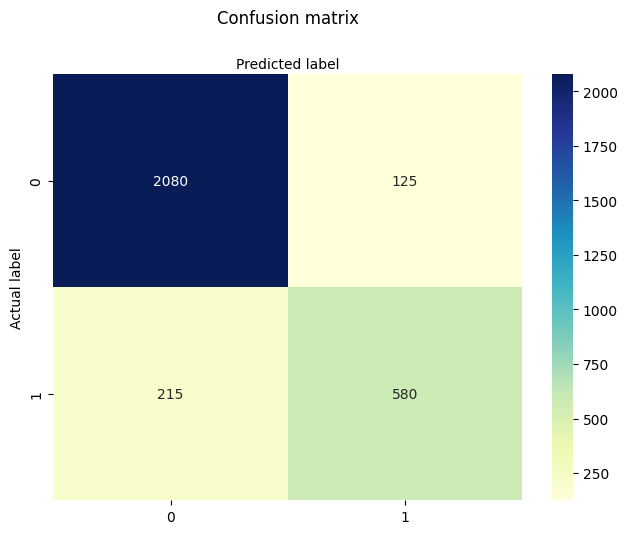

In [29]:
print("\nscore_")
score = knn.score(x_test, y_test)
print(score)

y_predicted = knn.predict(x_test)
y_predicted_proba = knn.predict_proba(x_test)

print("\n TP | FP \nFN | TN \n")
cm1 = confusion_matrix(y_test, y_predicted)
utils.plot_confusion_matrix(cm1)

ROC AUC Score: 0.9300380781243315


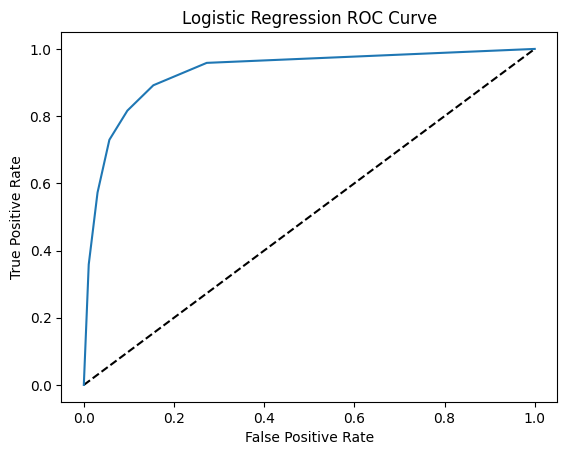

In [30]:
from sklearn.metrics import roc_auc_score
my_roc_auc_score1 = roc_auc_score(y_test, y_predicted_proba[:,1])
print("ROC AUC Score: "+ str(my_roc_auc_score1))
utils.plot_roc_curve(knn,x_test,y_test)

Accuracy = TP+TN / TP+TN+FP+FN
<br>Precision = TP / TP+FP
<br>Recal = TP / TP+FN
<br>F1-score = 2 * (Precision*Recal) / (Precision+Recal)

In [31]:
print("\nClassification Report")
report1 = classification_report(y_test,y_predicted)
print(report1)


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2205
           1       0.82      0.73      0.77       795

    accuracy                           0.89      3000
   macro avg       0.86      0.84      0.85      3000
weighted avg       0.88      0.89      0.88      3000



## Number of Neighbors Selection

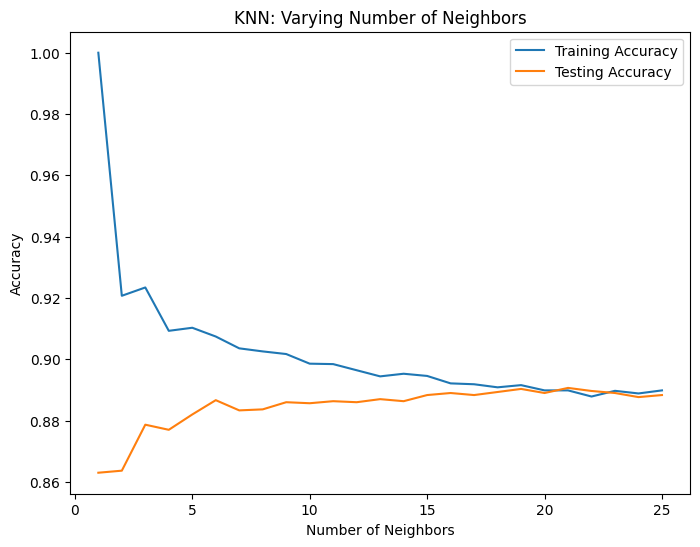

In [32]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

## Refined Model


score_
0.8903333333333333

 TP | FP 
FN | TN 



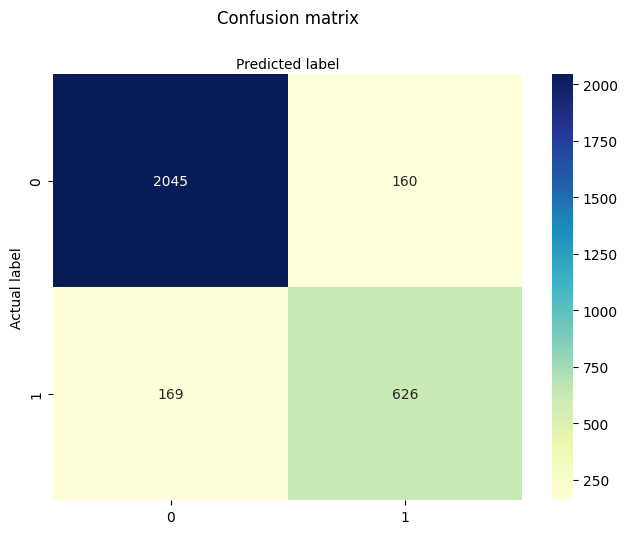

ROC AUC Score: 0.9443215105748797


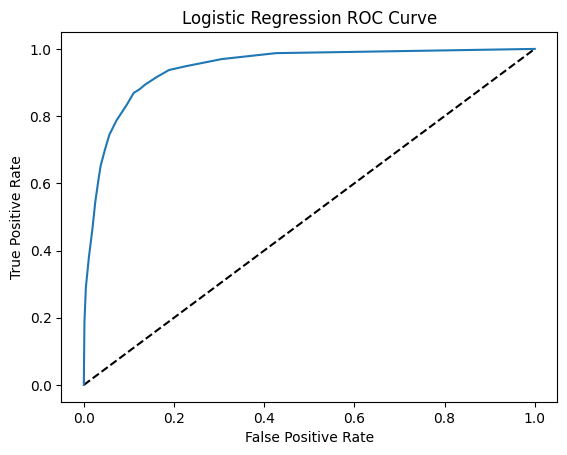


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2205
           1       0.80      0.79      0.79       795

    accuracy                           0.89      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.89      0.89      0.89      3000



In [36]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)

print("\nscore_")
score = knn.score(x_test, y_test)
print(score)
y_predicted = knn.predict(x_test)
y_predicted_proba = knn.predict_proba(x_test)
print("\n TP | FP \nFN | TN \n")
cm1 = confusion_matrix(y_test, y_predicted)
utils.plot_confusion_matrix(cm1)

from sklearn.metrics import roc_auc_score
my_roc_auc_score1 = roc_auc_score(y_test, y_predicted_proba[:,1])
print("ROC AUC Score: "+ str(my_roc_auc_score1))
utils.plot_roc_curve(knn,x_test,y_test)

print("\nClassification Report")
report1 = classification_report(y_test,y_predicted)
print(report1)